## Machine Learning

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df = pd.read_csv(url,header=0,sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [63]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


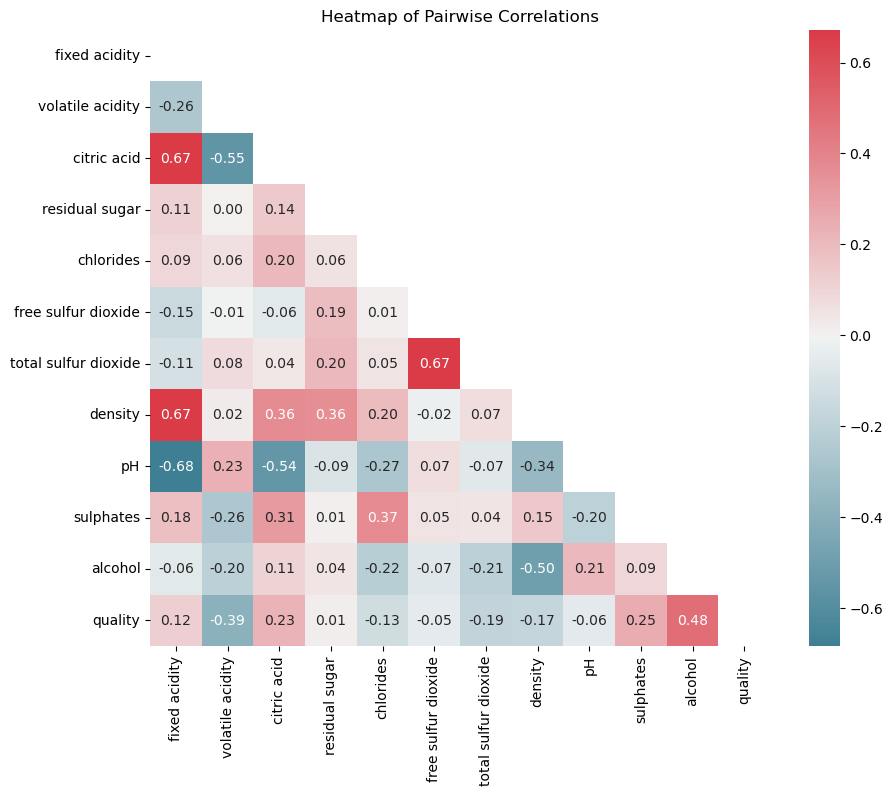

In [64]:
from string import ascii_letters

plt.figure(figsize=(10, 8))
plt.title("Heatmap of Pairwise Correlations")

# Compute the correlation matrix
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a custom diverging colormap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, cbar=True)

plt.show()

In [30]:
# sns.pairplot(df, kind='scatter', diag_kind='kde')

<Axes: xlabel='density', ylabel='alcohol'>

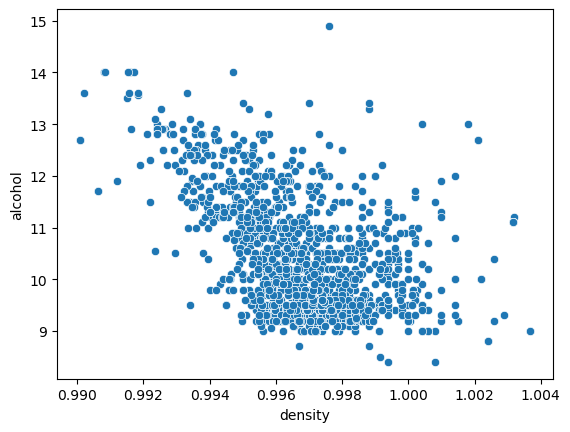

In [65]:
sns.scatterplot(x='density', y='alcohol', data=df)

<Axes: xlabel='density', ylabel='fixed acidity'>

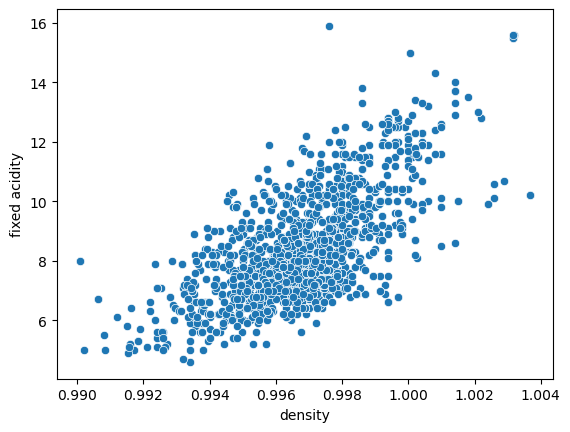

In [66]:
sns.scatterplot(x='density', y='fixed acidity', data=df)

Because the `density` variable appears to be correlated with other variables, it makes sense to remove it from the data frame along with the target variable which is `quality`.  We always want to avoid inputting similar information into the model to avoid exaggerating the predictive power of the model.  In statistical terms, this process is referred to as addressing multicollinearity.

In [67]:
X=df.drop(['density','quality'], axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4


In [68]:
y=df['quality']
y.unique()

array([5, 6, 7, 4, 8, 3])

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [71]:
# Set up training and testing data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=27 # random seed
)

lm = LinearRegression()
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)), "\n")

print("R_sq Training: ", lm.score(X_train, y_train))
print("R sq Testing: ", lm.score(X_test, y_test))

MSE: 0.3736749763640335
RMSE: 0.6112896010599506 

R_sq Training:  0.3307665672102461
R sq Testing:  0.41687630683080035


**R-square** (Coefficient of Determination): The percent of variation that is explained by the model 

Train - 33% of the variation in wine quality is explained by the regression model   
Test - 42% of the variation in wine quality is explained by the regression model   

In [72]:
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 5:
        reviews.append('0')
    else:
        reviews.append('1')
df['reviews'] = reviews

In [73]:
df.columns # Check if the column 'reviews' is added

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'reviews'],
      dtype='object')

In [74]:
df['reviews'].unique()

array(['0', '1'], dtype=object)

In [75]:
# Count of each target variable
from collections import Counter
Counter(df['reviews'])

# So we can see that there are 855 wines that has quality above 5 and 744 wines that has quality below 5

Counter({'1': 855, '0': 744})

In [76]:
X=df.drop(['density','quality','reviews'], axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4


In [77]:
y = df['reviews']
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: reviews, Length: 1599, dtype: object

### Standardization with StandardScaler
When variables are measured on different scales, it is common to standardize the values to even out the contributions that each variable makes to the model.  

In [78]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

### Principal Component Analysis (PCA)
This procedure automates the process of selecting independent predictor variables.

In [48]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA()
X_pca = pca.fit_transform (X)

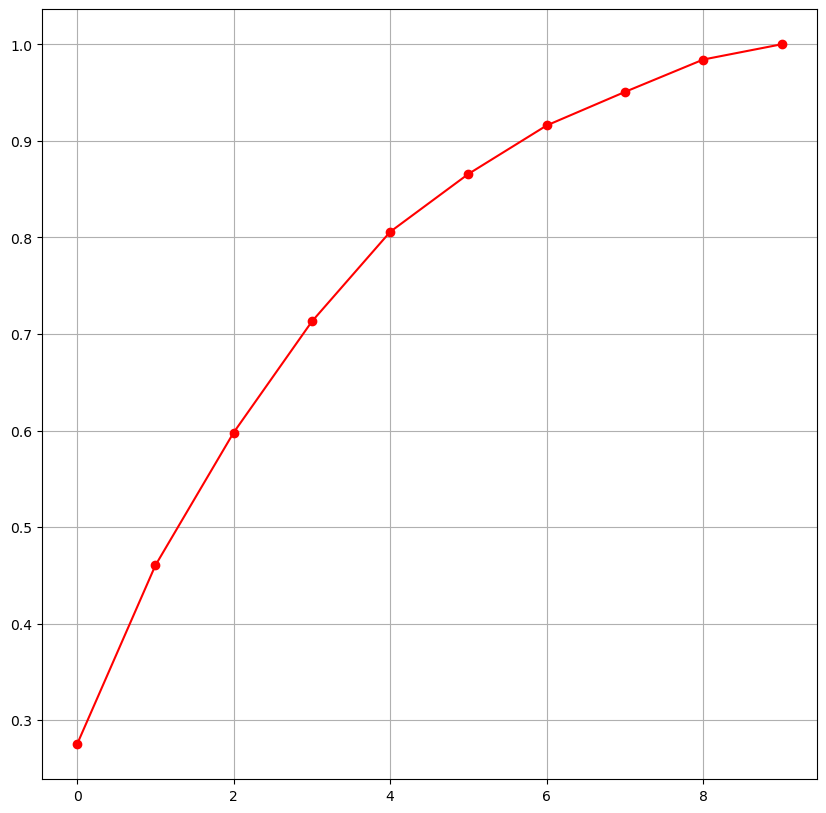

In [51]:
#plot the graph to find the principal components
plt. figure (figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt. grid()

In [ ]:
# As per the graph, we can see that 8 principal components attribute for more than 90% of variance in the data.
# We shall pick the first 8 components for our prediction.

pca_new = PCA(n_components=8)
X_new = pca_new.fit_transform (X)
X_new


array([[-2.14840491, -0.43223099, -1.09005437, ..., -0.33116317,
         0.43062046,  0.24837112],
       [-1.18078564,  1.45782544, -1.39396606, ...,  1.23229801,
         0.4755669 , -0.76045769],
       [-1.0591154 ,  0.42144021, -1.27248496, ...,  0.59190724,
         0.40872434, -0.3254307 ],
       ...,
       [-1.24258287,  0.46747609,  0.97776698, ...,  0.00452852,
         0.20166969, -0.75931395],
       [-2.20715965,  0.86334107,  0.47671301, ..., -0.10957786,
         0.3023732 , -0.14866093],
       [ 0.02378032, -0.05942192,  1.68961487, ..., -1.23031425,
        -0.31651879,  0.29710178]])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=27)

lm = LinearRegression()
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)), "\n")

print("R_sq Training: ", lm.score(X_train, y_train))
print("R sq Testing: ", lm.score(X_test, y_test))

MSE: 0.16238303067829882
RMSE: 0.4029677787097857 

R_sq Training:  0.27353068303852957
R sq Testing:  0.33871163977163377


### Try a Logistic regression approach

If we are not able to achieve good performance with one approach, we can try going back to the business question to see if there are adjustments we can make to help us develop a better model.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [85]:
lr = LogisticRegression(solver='lbfgs', multi_class='auto')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# Fit a logistic regression model
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

/opt/anaconda3/envs/example/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [83]:
# Print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print(lr_conf_matrix)
print(lr_acc_score * 100)

[[165  43]
 [ 67 205]]
77.08333333333334


In [60]:
# Creating metric function
def metrics_score(actual, predicted):
    from sklearn.metrics import confusion_matrix, classification_report
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6,3))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Exercise:

### Exercise: Secret Society

A group of friends have decided to start a secret society. The name will be the first letter of each of their names, sorted in alphabetical order.

Create a function called society_name() that takes in a list of names and returns the name of the secret society.


In [3]:
def society_name(lst):
    letters = []
    for i in lst:
        letters.append(i[0])
    return ''.join(sorted(letters))
    # return ''.join(sorted([i[0] for i in lst]))

In [ ]:
# Examples
s1 = society_name(["Adam", "Sarah", "Malcolm"]) # ➞ "AMS"
print(s1)

s2 = society_name(["Harry", "Newt", "Luna", "Cho"]) # ➞ "CHLN"
print(s2)

s3 = society_name(["Phoebe", "Chandler", "Rachel", "Ross", "Monica", "Joey"]) # ➞ "CJMPRR"
print(s3)

AMS
CHLN
CJMPRR


### Exercise: Convert to Decimal

Create a function called convert_to_decimal() to convert a list of percentages to their decimal equivalents. The decimal values should be floats.

In [ ]:
def convert_to_decimal(perc_lst):
    result=[]
    for i in perc_lst:
        x = float(i[:-1])/100
        result.append(x)
    return result

    # return [float(i.strip('%'))/100 for i in perc_lst]


# Tests
c1 = convert_to_decimal(["1%", "2%", "3%"]) # ➞ [0.01, 0.02, 0.03]
print(c1)

c2 = convert_to_decimal(["45%", "32%", "97%", "33%"]) # ➞ [0.45, 0.32, 0.97, 0.33]
print(c2)

c3 = convert_to_decimal(["33%", "98.1%", "56.44%", "100%"]) # ➞ [0.33, 0.981, 0.5644, 1.0]
print(c3)

[0.01, 0.02, 0.03]
[0.45, 0.32, 0.97, 0.33]
[0.33, 0.981, 0.5644, 1.0]
